In [1]:
import ptychoSampling.farfield.run_methods.utils as utils
import ptychoSampling.farfield.analysis_scripts.analysis_utils as anut
import ptychoSampling.farfield.analysis_scripts.adam_analysis_utils as adut
import ptychoSampling.farfield.analysis_scripts.lines_keys as lines_keys
from ptychoSampling.farfield.analysis_scripts.plot_utils import xy, PlotData
import matplotlib.pyplot as plt

from matplotlib.ticker import ScalarFormatter, NullFormatter
import dill
import dataclasses as dt
import numpy as np
import matplotlib as mpl
import string

colors = lines_keys.admm_beta_colors 
linestyles = lines_keys.admm_beta_linestyles
markers = lines_keys.admm_beta_markers

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
locations = ['poisson_1e3','poisson_1e4', 'poisson_1e6']
data_paths = [f'/raid/home/skandel/code/ptychoSampling_v2/experiments/farfield/{loc}/figures/' for loc in locations]

In [4]:
pickles = ['admm_gaussian_bp_betas', 'admm_poisson_bp_betas']

In [6]:
fluences = {37.9: r'$\overline{n}_{low}$', 379: r'$\overline{n}_{mod}$', 37900:r'$\overline{n}_{high}$'}

In [7]:
pdats = []
for d in data_paths:
    dats_this = []
    for p in pickles:
        fname = f'{d}/{p}.pkl'
        with open(fname, 'rb') as f:
            dats_this.append(dill.load(f))
    pdats.append(dats_this)

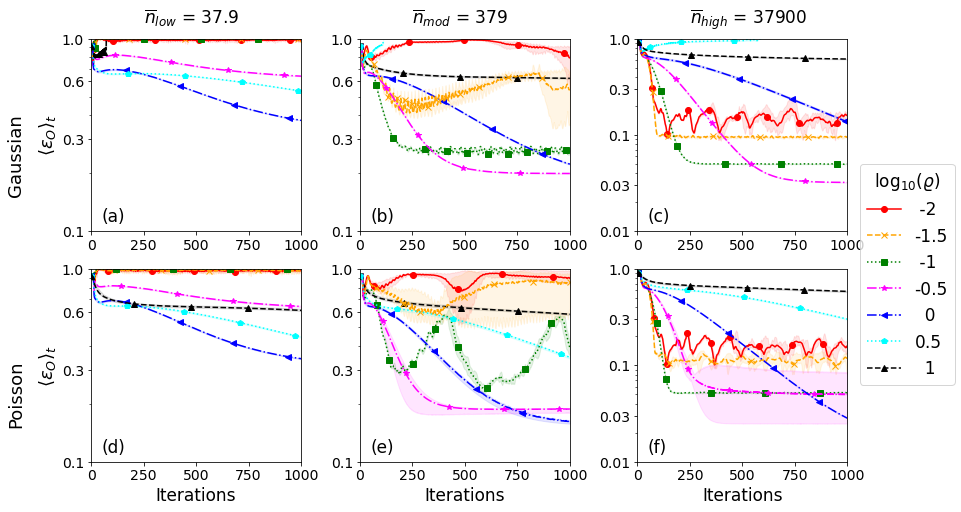

In [20]:
fig, axes = plt.subplots(2, 3, figsize=[12,7], constrained_layout=True)

for i, (fnum, flabel) in enumerate(fluences.items()):
    fluence_str = f'{flabel} = {fnum}'
    axes[0, i].text(0.25, 1.08, fluence_str,
                    transform=axes[0,i].transAxes, size=17)
    for j, d in enumerate(pdats[i]):
        for l, (x, y) in enumerate(d.xys):
            k = d.keys[l]
            axes[j, i].plot(x, y, markevery=0.2, color=colors[k], ls=linestyles[k], marker=markers[k], label=d.labels[l])
            axes[j, i].fill_between(x, d.lows[l][:x.size], d.highs[l][:x.size], color=colors[k], alpha=0.1)
            
        #if d.yscale != '':
        #    axes[j, i].set_yscale(d.yscale)
        #axes[j, i].set_ylim(d.ylim)
        #axes[j, i].set_yticks(d.yticks, minor=False)
        
        
        axes[j,i].set_yscale('log')
        axes[j,i].yaxis.set_major_formatter(ScalarFormatter())
        axes[j,i].yaxis.set_minor_formatter(NullFormatter())
        if i == 2:
            axes[j,i].set_yticks([0.01, 0.03, 0.1, 0.3, 1.0], minor=False)
            axes[j,i].set_yticklabels([0.01, 0.03, 0.1, 0.3, 1.0])
            axes[j,i].set_ylim([0.01, 1.0])
        else: 
            axes[j,i].set_yticks([0.1, 0.3, 0.6, 1.0], minor=False)
            axes[j,i].set_yticklabels([0.1, 0.3, 0.6, 1.0])
            
            axes[j,i].set_ylim([0.1, 1.0])
        #axes[j,i].set_yticks([])
        
        
        axes[j, i].set_xlim(d.xlim)
        axes[j, i].set_xticks([0, 250, 500, 750, 1000], minor=False)
        #axes[j, i].tick_params(axis='x', labelrotation=-15)
        axes[j, i].tick_params(which='both', labelsize=14)

        #legend = axes[i, j].legend(loc='best', fontsize=13, ncol=3)
        #legend.set_title(r'$\log_{10}(\beta)$', prop={'size':14})
        if i == 0:
            axes[j, i].set_ylabel(r'$\langle \epsilon_O\rangle_t$', fontsize=18)
        if j == 1:
            axes[j, i].set_xlabel('Iterations', fontsize=17)
        
        axes[j, i].text(0.05, 0.05, '(' + string.ascii_lowercase[j * 3 + i] + ')', transform=axes[j, i].transAxes, 
                        size=17)

axes[0,0].annotate('Gaussian', xy=(-0.4, 0.2), xycoords='axes fraction',
                   fontsize=18, rotation=90) 
axes[1,0].annotate('Poisson', xy=(-0.4, 0.2), xycoords='axes fraction',
                   fontsize=18, rotation=90) 
#legend = axes[0,1].legend(loc='best', ncol=3)
#legend.set_title(r'$\log_{10}(\beta)$', prop={'size':13})
handles, labels = axes[0,0].get_legend_handles_labels()
legend = fig.legend(handles, labels, bbox_to_anchor=(1.11, 0.7),  ncol=1, fontsize=17)
legend.set_title(r'$\log_{10}(\varrho)$', prop={'size':17})
#plt.subplots_adjust(top=0.95, bottom=0.1, left=0.1, right=0.9, hspace=0.2,
#                    wspace=0.25)
#plt.tight_layout()
plt.savefig('admm_betas.pdf', bbox_inches='tight')